In [1]:
from gather_averages_2_1 import gather_averages
import matplotlib.pyplot as plt

In [8]:
# Extract data
inputdir="/home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538"
all_reps_extracted = gather_averages(inputdir)
all_reps=averages.reset_index()

Input directory is " /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538
Workload is " writeOnly
Processing directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_4vc
    Repetition 1
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_4vc/1
    Repetition 2
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_4vc/2
    Repetition 3
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_4vc/3
Processing directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_64vc
    Repetition 1
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_64vc/1
    Repetition 2
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_163538/writeOnly_64vc/2
    Repetition 3
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-10_16353

In [12]:
# Group by and calculate AVG and MEAN
averages = all_reps.groupby(['num_clients', 'workload'], as_index=True).agg(
                      {'sum_throughput':['mean','std'],'avg_responsetime':['mean','std']})

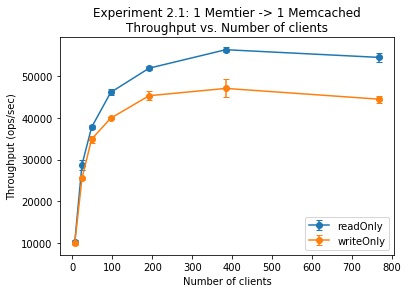

In [84]:
avg = averages.reset_index()
avg
avg
fig, ax = plt.subplots()
ax.set_ylim([0,70000])
ax.set_xlim([0, 270])
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('sum_throughput', 'mean')], yerr=2*grp[('sum_throughput', 'std')], label=key,  marker='o', capsize=3)
ax.legend(loc="lower right")
ax.set_title("Experiment 2.1: 1 Memtier -> 1 Memcached\nThroughput vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Throughput (ops/sec)")
plt.show()

In [34]:
grp['workload']

In [ ]:
### Number of clients vs throughput
rep1_avg = xput_data.query('rep == 2')
x = rep1_avg.query('workload == "readOnly"')['num_clients']
y1 = rep1_avg.query('workload == "readOnly"')['sum_throughput']
y2 = rep1_avg.query('workload == "writeOnly"')['sum_throughput']
fig, ax = plt.subplots()
ax.set_ylim([0,70000])
ax.set_xlim([0, 270])
ax.plot(xaxis, y1, label='read-only', marker='o')
ax.plot(xaxis, y2, label='write-only', marker='o')
plt.xticks(xaxis)

error = 0.1 + 70 * x
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax.errorbar(x, y1, yerr=asymmetric_error, fmt='o')

ax.legend(loc="lower right")
ax.set_title("Experiment 2.1: 1 Memtier -> 1 Memcached\nThroughput vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Throughput (ops/sec)")
plt.show()